In [1]:
import control as ctrl
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Polos y Ceros en los modelos de espacio de estados

## Polos de un sistema

Comenzaremos nuestro análisis tratando de respondernos ¿que es un polo en una función transferencia?¿Cómo identificamos un polo en el dominio temporal?

Del control clásico podemos recordar que un **polo** es un valor de frecuencia generalizada $s$ tal que si $s=p_i$ el sistema puede responder a ciertas condiciones iniciales $\mathbf{x_0}$ como $Ke^{p_it}$ si no se está excitando al sistema con ninguna $u(t)$. En este contexto a $p_i$ se le llama **frecuencia natural** o **modo natural** del sistema.

Para obtener los polos de un sistema en espacio de estados, vamos a escribir en forma de ecuaciones de estado lo que describí en el parrafo anterior. Esto sería:

$$u(t)=0,\qquad \mathbf{x}(t)=\mathbf{x}_0e^{p_it},\qquad y(t)=K_ye^{p_it},$$

entonces se tiene que:

$$\dot{\mathbf{x}}(t) = \mathbf{A}\mathbf{x}(t)+\mathbf{B}u(t) = \mathbf{A}e^{p_it}\mathbf{x}_0$$

o escrito de otra forma:

$$\mathbf{Ax}_0 = p_i\mathbf{x}_0.$$

Donde sabemos que este es el problema de autovalores y autovectores de una matriz. Entonces aquí nuevamente vemos que los autovalores de la matriz $\mathbf{A}$ son los polos del sistema. Además, podemos ver que las condiciones iniciales correspondientes para que el sistema evolucione con todos sus estados unicamente con el modo natura $p_i$ son las que se encuentran en la dirección del autovector correspondiente a ese autovalor $p_i$,

## Ejercicio 1

Dado un sistema descripto por las siguienter matrices del espacio de estados:

$$\mathbf{A}=
  \begin{bmatrix}
    -3 & 2\\
    -1 & 0
  \end{bmatrix},\qquad
\mathbf{B}=
  \begin{bmatrix}
    1\\
    0
  \end{bmatrix},\qquad
\mathbf{C}=
  \begin{bmatrix}
    -3 & 2
  \end{bmatrix},\qquad
D = 0
$$


Usando la teoría obtener los polos del sistema y condiciones iniciales a partir de las cuales todos los estados del sistema evolucionen solo con el mismo modo natural. Obtener una condición inicial para cada modo y verificar superponiendo graficas.

## Solución

Para resolver esto vamos a usar `sympy`, aunque facilmente se hubiera podido usar `numpy` ya que el problema de autovalores en general no dificultoso de resolver computacionalmente. Sin embargo, primero vamos a implementar el sistema usando el paquete de control de Python.

In [2]:
A=[[-3, 2],[-1,0]]
B=[[1],[0]]
C=[[1,-3]]
D=0
sys = ctrl.ss(A,B,C,D)
sys

StateSpace(array([[-3.,  2.],
       [-1.,  0.]]), array([[1.],
       [0.]]), array([[ 1., -3.]]), array([[0.]]))

Vamos a escribir en `sympy` el problema a resolver. Para eso primero defino los simbolos a utilizar:

In [3]:
pi, x01, x02 = sp.symbols('pi, x01, x02')
x0= sp.Matrix([x01, x02])
Asp=sp.Matrix(A)
polos = sp.solve(sp.det((pi*sp.eye(2,2)-Asp)), pi) # resuelvp det(piI-A)=0 variando pi
polos

[-2, -1]

De esta manera tenemos los autovalores. Para obtener un autovector para el polo en -2, podemos hacer:

In [4]:
sp.solve((-2*sp.eye(2,2)-Asp)*x0, x0)

{x01: 2*x02}

Esto quiere decir que `x01` tiene que ser 2 veces `x02`. Bien! tenemos el conjunto completo de autectores para ese autovalor en forma simbólica.

Haciendo lo mismo para el polo en -1:

In [5]:
sp.solve((-1*sp.eye(2,2)-Asp)*x0, x0)

{x01: x02}

Esto se traduce como que el conjunto de autovectores válidos para ese autovalor es `x01`=`x02`. Con los autovalores y autovectores tenemos entonces el problema podemos corroborar lo dicho en teoría haciendo una simulación del sistema frente a las condiciones iniciales dadas por un autovalor y verificar que responde según la dinámica del modo del autovalor asociado.

In [6]:
pi=-2
x02=1
x01=2*x02
tp1,yp1,xp1 = ctrl.initial_response(sys, X0=[x01, x02], return_x=True)

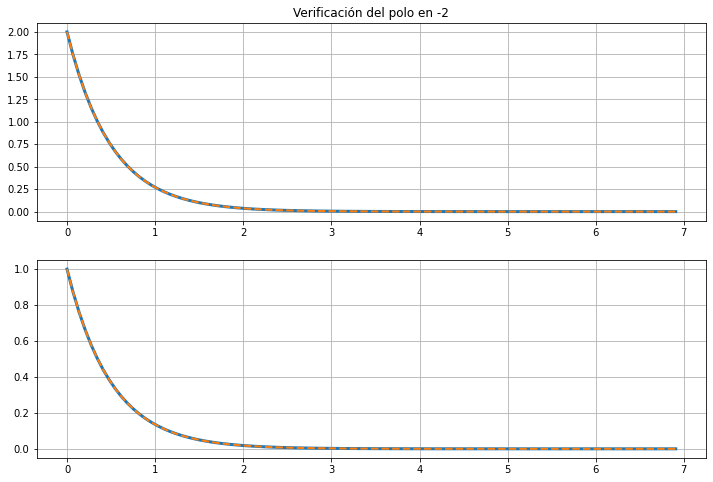

In [7]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
ax[0].plot(tp1, xp1[0,:], lw=3, label='estado 1')
ax[0].plot(tp1, x01*np.exp(pi*tp1), '--', lw=2, label='verificación estado 1')
ax[1].plot(tp1, xp1[1,:], lw=3, label='estado 2')
ax[1].plot(tp1, x02*np.exp(pi*tp1), '--', lw=2, label='verificación estado 2')
ax[0].set_title('Verificación del polo en -2')
ax[0].grid()
ax[1].grid();

Podemos ver que la respuesta de los estados (y por ende la salida) se corrsponden con una dinámica en el modo -2.

Repetimos el procedimiento para el otro polo:

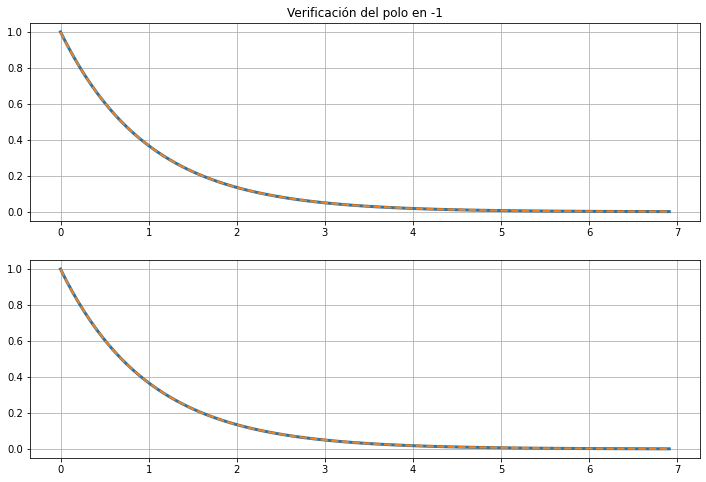

In [8]:
pi=-1
x02=1
x01=x02
tp1,yp1,xp1 = ctrl.initial_response(sys, X0=[x01, x02], return_x=True)
fig, ax = plt.subplots(2,1, figsize=(12,8))
ax[0].plot(tp1, xp1[0,:], lw=3, label='estado 1')
ax[0].plot(tp1, x01*np.exp(pi*tp1), '--', lw=2, label='verificación estado 1')
ax[1].plot(tp1, xp1[1,:], lw=3, label='estado 2')
ax[1].plot(tp1, x02*np.exp(pi*tp1), '--', lw=2, label='verificación estado 2')
ax[0].set_title('Verificación del polo en -1')
ax[0].grid()
ax[1].grid();

Notar que el problema de autovalores y autovectores lo hemos resuleto usando `sympy`. Sin embargo, en la práctica es más sencillo resolver este problema numericamente usando `numpy`. Es decir:

In [9]:
aval, avec = np.linalg.eig(A)
aval, avec

(array([-2., -1.]),
 array([[-0.89442719, -0.70710678],
        [-0.4472136 , -0.70710678]]))

La solución numérica del autovalor dada por `numpy` es la que se corresponde con módulo 1. Es decir me devuelve un autovector de módulo 1 por cada autovalor.

## Cero del sistema

De control clásico sabemos que un **cero** $z_i$ es un punto de frecuencia generalizada $s$ tal que el sistema puede ser excitado en esa frecuencia ($u(t) = u_0e^{z_it}$), tener estados no nulos ($\mathbf{x}_0\neq \mathbf{0}$) y aún así su salida es nula ($y(t)\equiv 0$).

Si escribimos en forma de espacio de estados lo que acabamos de decir del cero, tenemos entonces que:

$$u=u_0e^{z_it},\qquad \mathbf{x}(t)=\mathbf{x}_0e^{z_it},\qquad y(t)\equiv 0$$

Por lo tanto:

$$\dot {\mathbf{x}} =z_ie^{z_it}\mathbf{x}_0=\mathbf{A}e^{z_it}\mathbf{x}_0+\mathbf{B}u_0e^{z_it}$$

o lo que es lo mismo:

$$
\begin{bmatrix}
z_i\mathbf{I}-\mathbf{A}&-\mathbf{B}\end{bmatrix}\begin{bmatrix}\mathbf{x}_0\\u_0\end{bmatrix}=\mathbf{0}.
$$

Para la salida tenemos:

$$y(t) = \mathbf{C}\mathbf{x}(t) + Du(t) = \mathbf{C}e^{z_it}\mathbf{x}_0+Du_0e^{z_it}\equiv 0 $$

o lo que es lo mismo:

$$
\begin{bmatrix}\mathbf{C}&D\end{bmatrix}\begin{bmatrix}\mathbf{x}_0\\u_0\end{bmatrix}=0.
$$

Combinando las dos anteriores:
$$
\begin{bmatrix}
  z_i\mathbf{I}-\mathbf{A}&-\mathbf{B}\\
  \mathbf{C}&D
\end{bmatrix}
\begin{bmatrix}
  \mathbf{x}_0\\
  u_0
  \end{bmatrix} = 
\begin{bmatrix}
  \mathbf{0}\\
  0
\end{bmatrix}
$$

Vemos que este sistema tiene solución más allá de la trivial, unicamente si el determinante de la matriz de la izquierda anterior es 0. Es decir:

$$\det{\begin{bmatrix}
  z_i\mathbf{I}-\mathbf{A}&-\mathbf{B}\\
  \mathbf{C}&D
\end{bmatrix}} = 0$$

Los valores de $z_i$ que cumplan con la ecuación anterior son los ceros de transferencia del sistema.

## Ejercicio 2

Obtener los ceros de transferencia para el sistema del ejercicio anterior mediante la formula recien obtenida.

## Solución

Para resolver este problema de forma simbólica utilizaré `sympy`. Por lo tanto lo primer que haré será escribir todas las matrices en en modulo de `sympy`.

In [10]:
zi = sp.symbols('zi')
Asp = sp.Matrix(A)
Bsp = sp.Matrix(B)
Csp = sp.Matrix(C)
Dsp = sp.Matrix([D])

Vamos a escribir la matriz para la cual tenemos que resolver el determinante:

In [11]:
abcd = (zi*sp.eye(2,2)-Asp).col_insert(2,-Bsp).row_insert(2,Csp.col_insert(2,Dsp))
abcd

Matrix([
[zi + 3, -2, -1],
[     1, zi,  0],
[     1, -3,  0]])

In [12]:
zi=sp.solve(sp.det(abcd),zi)
zi

[-3]

Vemos que entonces el determinante de la matriz armada tiene un solo cero en $z_i=-3$. Por lo que el sistema tiene un solo cero en -3.

Vamos a obtener ahora las condiciones iniciales $\mathbf{x_0}$ y $u_0$ para las cuales el sistema tiene salida nula por más que se lo excite con una señal $u(t)$ tal que $u(t)=u_0e^{-3t}$.

Sabemos que la matriz `abcd` anterior es de determinante 0, $z_i=-3$. Por lo que existen inifinitas soluciones para $\mathbf x_0, u_0$ que cumplen con:

$$
\begin{bmatrix}
z_i\mathbf{I}-\mathbf{A}&-\mathbf{B}\end{bmatrix}\begin{bmatrix}\mathbf{x}_0\\u_0\end{bmatrix}=\mathbf{0}.
$$

Asumimos $u_0=1$ y resolvemos:

In [13]:
x10, x20 = sp.symbols('x10, x20')
x0 = sp.Matrix([x10, x20, 1])
sol = sp.solve((abcd*x0).subs({'zi':-3}, x0))
sol

[{x10: -3/2, x20: -1/2, zi: -3}]

Vamos a poner las condiciones iniciales en formato numérico, ya que por más que tenga un valor, siguen siendo datos del tipo de `sympy` es decir, simbólicos.

In [14]:
x0=[np.float64(sol[0][x10]), np.float64(sol[0][x20])]

Y ahora simulamos el sistema con la respuesta forzada $u(t)=e^{-3t}$:

In [15]:
t=np.linspace(0,5,20001)
tz,yz,xz = ctrl.forced_response(sys, T=t, U=1*np.exp(-3*t), X0=[np.float64(sol[0][x10]), np.float64(sol[0][x20])], return_x=True)

Voy a graficar la salida en dos escalas:
- en la primera la que por default muestra la librería `matplotlib`
- la segunda una escala más normal para los valroes que estamos manejando en el sistema.

Podemos ver que la salida se mantiene muy cercana a cero. El alejamiento de cero se debe a errores numéricos presentes sobre todo en la aproximación de la entrada (para el módulo de control cuando la simula la entrada será escalonada).

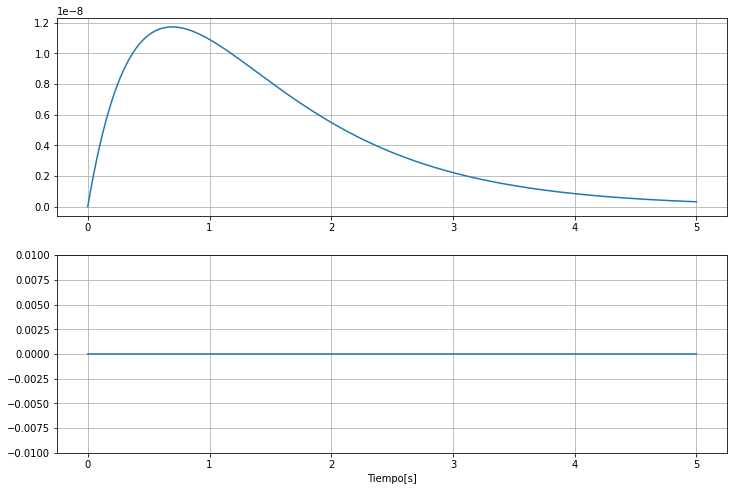

In [16]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
ax[0].plot(tz,yz)
ax[0].grid()
ax[1].plot(tz,yz)
ax[1].set_ylim([-.01,0.01])
ax[1].grid()
ax[1].set_xlabel('Tiempo[s]');

Finalmente, para verificar que todos los cáculos realizados son correctos podemos obtener la función transferencia del sistema en espacio de estados.

In [17]:
ctrl.tf(sys)

TransferFunction(array([1., 3.]), array([1., 3., 2.]))

O directamente pedirle al módulo de control que nos devuelva los polos y los ceros:

In [18]:
sys.pole(), sys.zero()

(array([-2., -1.]), array([-3.+0.j]))

Que vemos son los mismos que obtuvimos a partir de las definiciones teóricas de lo que significa un polo y un cero en el dominio temporal.